In [ ]:
# Import necessary libraries
import pandas as pd
import kagglehub
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset using kagglehub
path = kagglehub.dataset_download("ritwikb3/heart-disease-cleveland")
print("Path to dataset files:", path)

# Load the dataset (assuming it's a CSV file)
cleveland_df = pd.read_csv(f'{path}/Heart_disease_cleveland_new.csv')

# Check the first few rows to understand the structure
cleveland_df.head()


100%|██████████| 3.49k/3.49k [00:00<00:00, 176kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ritwikb3/heart-disease-cleveland/versions/1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


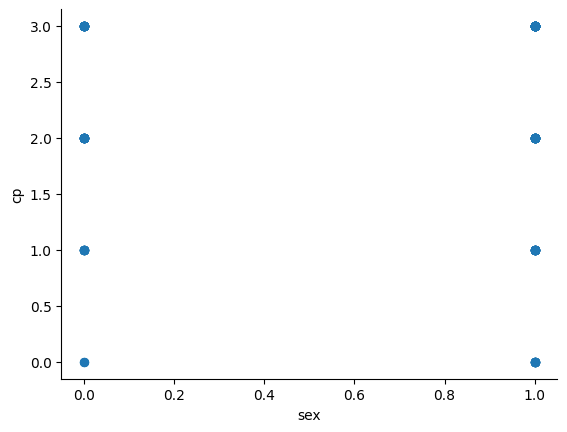

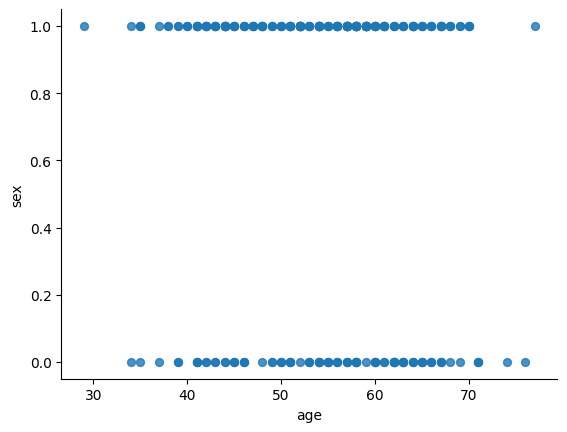

In [ ]:
from matplotlib import pyplot as plt

cleveland_df.plot(kind='scatter', x='sex', y='cp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
cleveland_df.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


In [ ]:
# Checking for missing values (though the dataset is mentioned to have no missing values)
cleveland_df.isnull().sum()

# Convert categorical columns to numerical using encoding (e.g., sex, cp, etc.)
cleveland_df['sex'] = cleveland_df['sex'].map({1: 'Male', 0: 'Female'})
cleveland_df['cp'] = cleveland_df['cp'].map({0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'})
cleveland_df['fbs'] = cleveland_df['fbs'].map({0: 'False', 1: 'True'})
cleveland_df['restecg'] = cleveland_df['restecg'].map({0: 'Normal', 1: 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'})
cleveland_df['exang'] = cleveland_df['exang'].map({0: 'No', 1: 'Yes'})
cleveland_df['slope'] = cleveland_df['slope'].map({0: 'up', 1: 'flat', 2: 'down'})
cleveland_df['thal'] = cleveland_df['thal'].map({1: 'normal', 2: 'fixed defect', 3: 'reversible defect'})

# Handle categorical columns by encoding them to numbers
cleveland_df = pd.get_dummies(cleveland_df, drop_first=True)

# Scaling the features (numerical columns)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cleveland_df[numerical_columns] = scaler.fit_transform(cleveland_df[numerical_columns])

# Separate features and target variable
X_cleveland = cleveland_df.drop('target', axis=1)
y_cleveland = cleveland_df['target']


In [ ]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train_cleveland, X_test_cleveland, y_train_cleveland, y_test_cleveland = train_test_split(X_cleveland, y_cleveland, test_size=0.3, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": GradientBoostingClassifier()
}

# Train and evaluate models on Cleveland dataset
for model_name, model in models.items():
    model.fit(X_train_cleveland, y_train_cleveland)
    y_pred_cleveland = model.predict(X_test_cleveland)
    print(f"{model_name} on Cleveland Dataset:")
    print("Accuracy:", accuracy_score(y_test_cleveland, y_pred_cleveland))
    print("ROC AUC:", roc_auc_score(y_test_cleveland, model.predict_proba(X_test_cleveland)[:, 1]))
    print(classification_report(y_test_cleveland, y_pred_cleveland))


Logistic Regression on Cleveland Dataset:
Accuracy: 0.8021978021978022
ROC AUC: 0.9035852713178294
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        48
           1       0.76      0.86      0.80        43

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.81      0.80      0.80        91

SVM on Cleveland Dataset:
Accuracy: 0.8461538461538461
ROC AUC: 0.8977713178294574
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        48
           1       0.85      0.81      0.83        43

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91

Random Forest on Cleveland Dataset:
Accuracy: 0.8241758241758241
ROC AUC: 0.902374031007752
              precision    recall  f1-score   support

           0     

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for Random Forest: 0.8296788482834995
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Score for XGBoost: 0.8346622369878183
Stacking Classifier on Cleveland Dataset:
Accuracy: 0.8021978021978022
ROC AUC: 0.8982558139534884
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        48
           1       0.80      0.77      0.79        43

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



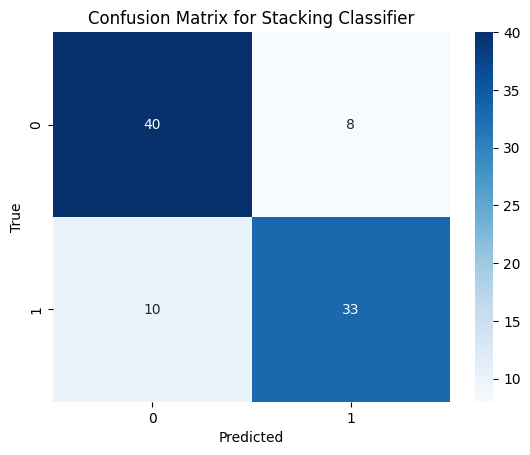

In [ ]:
# Hyperparameter tuning for RandomForestClassifier and XGBoost
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize models
rf_model = RandomForestClassifier()
xgb_model = GradientBoostingClassifier()

# Use GridSearchCV to tune hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train_cleveland, y_train_cleveland)

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train_cleveland, y_train_cleveland)

# Best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Score for XGBoost:", grid_search_xgb.best_score_)

# Implementing a Stacking Classifier
stacking_model = StackingClassifier(estimators=[
    ('rf', RandomForestClassifier(**grid_search_rf.best_params_)),
    ('xgb', GradientBoostingClassifier(**grid_search_xgb.best_params_))
], final_estimator=LogisticRegression())

stacking_model.fit(X_train_cleveland, y_train_cleveland)
y_pred_stacking = stacking_model.predict(X_test_cleveland)

print("Stacking Classifier on Cleveland Dataset:")
print("Accuracy:", accuracy_score(y_test_cleveland, y_pred_stacking))
print("ROC AUC:", roc_auc_score(y_test_cleveland, stacking_model.predict_proba(X_test_cleveland)[:, 1]))
print(classification_report(y_test_cleveland, y_pred_stacking))

# Visualizing the confusion matrix for the stacking model
conf_matrix = confusion_matrix(y_test_cleveland, y_pred_stacking)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Stacking Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()